# Question 1

In [33]:
from scipy.stats import beta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# General concept about how to find the area between two intervals.
a, b = 3, 7
z = beta.cdf(0.75, a, b)
y = beta.cdf(0.25,a,b)

z-y

0.599334716796875

Parameters for Beta are `(3,7)`
The mass of the interval e.g. [0,1], is the cdf for 1 subtract the cdf for 0

In [35]:
def beta_measure(a,b): # Defining the Beta Measure
    # Define parameters c and d
    c = 3 
    d = 7
    # Define the cdf function so we can subtract to find area under curve
    cdf1 = beta.cdf(a,c,d)
    cdf2 = beta.cdf(b,c,d)
    return cdf2 - cdf1

In [36]:
# Define a value for each interval
q_a = beta_measure(0,1)
q_b = beta_measure(0,0)
q_c = beta_measure(0.25,0.75)
q_d = beta_measure(0,0.5)
q_e = beta_measure(0.5,1)

questions = [q_a,q_b,q_c,q_d,q_e]
for question in questions:
    print(f"Probability Mass Function = ",question)

Probability Mass Function =  1.0
Probability Mass Function =  0.0
Probability Mass Function =  0.599334716796875
Probability Mass Function =  0.91015625
Probability Mass Function =  0.08984375


Plotting the PDF for `Beta(3,7)`

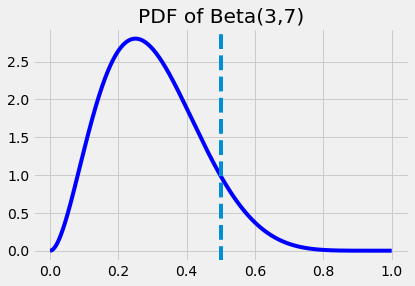

In [37]:
# Creating 10000 equally spaced numbers to plot the pdf of Beta (3,7)
x = np.linspace(0,1,10000) 
pdf = beta.pdf(x, 3, 7)

plt.style.use('fivethirtyeight')
plt.plot(x, pdf, 'b')
plt.title('PDF of Beta(3,7)')
plt.axvline(x=0.5, linestyle = '--')

Yes the Probability masses match up with the PDF. For example, interval `[0,1] = 1`, covers the whole area of the curve. The interval of `[0,0.5]` accounts for the majority of the probability and we can see this in the curve as it is positiviely skewed and the area underneath the curve up until the dashed line from 0.5.

# Question 2

In [38]:
import scipy.integrate as integrate

In [39]:
# Defining our function for beta_pdf
def beta_pdf(x):
    c = 3
    d = 7
    pdf = beta.pdf(x,c,d)
    return pdf

In [40]:
# Using f(x), as for the quad function we only need a place holder for the function (beta_pdf) we apply to x.
def f(x):
    return beta_pdf(x)

q2_a = integrate.quad(f, 0,1) # will take the f defined as beta_pdf and then pass through the values of x we defined by the limits.
q2_b = integrate.quad(f, 0,0)
q2_c = integrate.quad(f, 0.25,0.75)
q2_d = integrate.quad(f, 0,0.5)
q2_e = integrate.quad(f, 0.5,1)


questions = [q2_a,q2_b,q2_c,q2_d,q2_e]
for question in questions:
    print(f"Integral for = ",question[0])

Integral for =  1.0
Integral for =  0.0
Integral for =  0.5993347167968751
Integral for =  0.9101562499999999
Integral for =  0.08984374999999997


As you see above, the intergral values for the defined limits are identical to the probability masses computed in Question 1. This is because the integral of a PDF derives the CDF, with respect the defined limits.

# Question 3

The support for `Beta(3,7)` and `Beta(7,3)` are the same at [0,1]. When summing `Beta(3,7)` and `Beta(7,3)` the support becomes [0,1,2]. This is because t can take values between 0 and 1, whilst `2 - t` takes values between 1 and 2.

In [41]:
# Here we have to defind two seperate PDF functions for Beta.
def beta_pdf_1(x):
    c = 3
    d = 7
    pdf = beta.pdf(x,c,d)
    return pdf

def beta_pdf_2(x):
    c = 7
    d = 3
    pdf = beta.pdf(x,c,d)
    return pdf

In [42]:
# Then we defind the intergand by x, the placeholders for our functions f1 and f2 and the t value.
def integrand(x, f1, f2, t):
    return f1(x)*f2(t-x)

0.0
7.877306756648536e-14
6.953875697935422e-11
2.2351644345551265e-09
2.845671855137813e-08
1.9821228161985785e-07
9.555209830535592e-07
3.572327583034246e-06
1.1085871164125421e-05
2.9834874636324073e-05
7.174688648590836e-05
0.0001574950143136613
0.00032058950047012506
0.0006124017379508888
0.0011080400043001852
0.0019129123056488432
0.003169727264710335
0.005065603789829974
0.007838888708299834
0.011785222635992576
0.017262351293904684
0.02469315533746064
0.034566367293460576
0.04743446411265862
0.06390826355642248
0.08464781840326539
0.11034928988586029
0.14172759190409198
0.1794947293798766
0.2243339061141906
0.2768696484060597
0.3376343787659589
0.4070320778982375
0.4852998905050872
0.5724687602923931
0.668324420069007
0.7723703114960362
0.8837942650422569
1.0014410392883388
1.1237930719315068
1.2489620880695873
1.374694466547255
1.4983935524554912
1.6171623811111695
1.7278705570873536
1.8272493137041335
1.9120190595095352
1.9790539996796324
2.0255887020942867
2.04947175965258
2

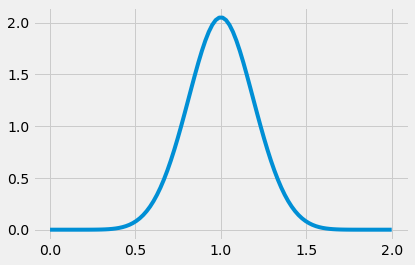

In [43]:
# Now we need to create a list of values between 0 and 2.
# We make a loop for the list we created
t_list = np.linspace(0,2, 100)
i = []
for t in t_list: # for every value in the list
    f_1_2 = integrate.quad(integrand, 0, 2, args=(beta_pdf_1, beta_pdf_2, t))[0] # integrate the integrand with respects to x, using t = 0 and return the first value which is the integral.
    print(f_1_2) # Print this number
    i.append(f_1_2) # add this number to the list
# The list will continue this process until the number of t's = 100
plt.plot(t_list,i)

(array([  33.,  112.,  302.,  665., 1113., 1707., 2177., 2023., 1441.,
         427.]),
 array([0.20062141, 0.27948613, 0.35835086, 0.43721559, 0.51608031,
        0.59494504, 0.67380976, 0.75267449, 0.83153922, 0.91040394,
        0.98926867]),
 <BarContainer object of 10 artists>)

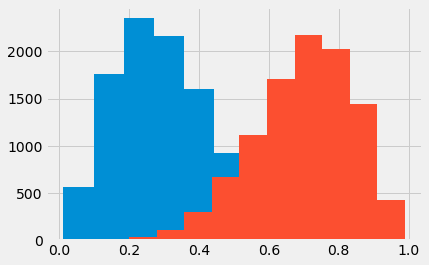

In [44]:
seed = 40

r1 = beta.rvs(3, 7, size=10000, random_state = seed)
r2 = beta.rvs(7,3, size=10000, random_state = seed + 1)

plt.hist(r1)
plt.hist(r2)

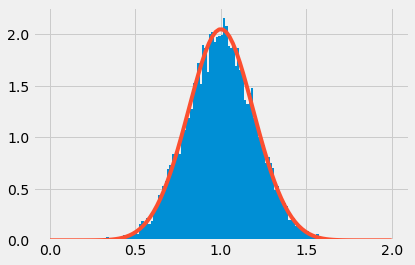

In [45]:
r_12 = r1+r2

plt.hist(r_12, int(np.sqrt(10000)), density = True)

plt.plot(t_list,i)



The PDF exhibits the change in support from `[0,1]` to `[0,2]` after you sum both the Beta distributions and is centred around 1, rather than being positivily or negatively skewed, like their individual plots.

# Question 4

In [46]:
import pandas_datareader as data

In [47]:
my_data = data.DataReader('MSFT', 'yahoo', '2012-11-02', '2022-11-02')

In [48]:
my_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-11-02,29.770000,29.330000,29.590000,29.500000,57131600.0,24.194626
2012-11-05,29.740000,29.330000,29.620001,29.629999,38070800.0,24.301241
2012-11-06,30.200001,29.610001,29.820000,29.860001,43401500.0,24.489876
2012-11-07,29.830000,29.049999,29.530001,29.080000,57871800.0,23.850157
2012-11-08,29.370001,28.799999,29.120001,28.809999,49841800.0,23.628710
...,...,...,...,...,...,...
2022-10-27,233.690002,225.779999,231.039993,226.750000,40424600.0,226.750000
2022-10-28,236.600006,226.050003,226.240005,235.869995,40647700.0,235.869995
2022-10-31,234.919998,231.149994,233.759995,232.130005,28357300.0,232.130005


(0.0, 300.0)

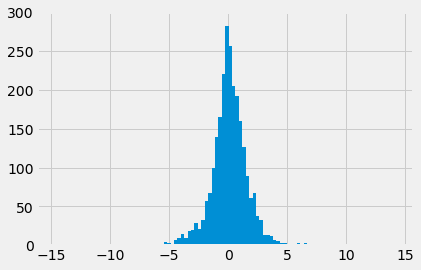

In [49]:
# Creating a ratio between close_t and close_t-1
perc_d_returns = my_data['Close']/my_data['Close'].shift(periods = 1)

returns = 100*(perc_d_returns - 1)

plt.hist(returns, bins= 100)
plt.ylim(0,300)

In [50]:
from scipy.stats import norm, kurtosis

In [51]:
k = kurtosis(returns, nan_policy='omit')
k

8.8078003169076

The family of distributions I believe that models the returns distribution well is the Normal distribution.

In [52]:
mle = norm.fit(returns[1])

print(f"The location of normal distribution is: {mle[0]}\nThe scale of normal distribution: {mle[1]} ")

The location of normal distribution is: 0.44067512124270625
The scale of normal distribution: 0.0 


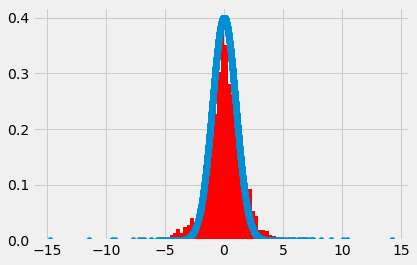

In [53]:
plt.hist(returns, bins= 100, density=True, color='r')

p_d = norm.pdf(returns)
plt.scatter(returns, p_d)

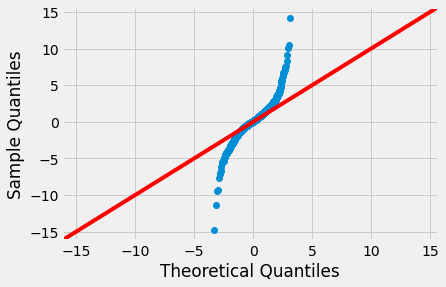

In [54]:
import numpy as np
import statsmodels.api as sm
import pylab


sm.qqplot(returns, line='45')
pylab.show()

A large portion of the points are below and above the line, which is an indication that the returns is not normally distributed and the extreme values are more likely than the normally distributed ones. What is clearly being exhibited here are long tail's, which correspond to the extreme value's of the daily returns, near 5% and -5%. The 'black swan' theory proposed by Nassim Taleb, with respect to anomalous events, whereby their occurance is still likely despite not being predicted, is a good metaphor for the stock market for which our data is based upon. The majority of data in the world is not normally distributed and assuming a normal distribution can by proxy be an underestimation of outliers and extreme values.